# precision-recall curve

In [1]:
# 분류 모형의 정확도를 평가하기 위한 Precision-Recall curve
# precision(정밀도)과 recall(재현율) 간의 절충점을 보여주는 그래프
# 곡선 아래의 면적 : ACU-PR
# 곡선 아래의 면적이 클수록 좋은 모형
# ROC 커브는 0.5에서 점차 증가하여 1에 도달하지만
# PR 커브는 1.0에서 점차 줄어드는 형태

In [2]:
import pandas as pd

df = pd.read_csv("c:/workspace3/data/player.csv")
df.columns

Index(['id', 'player_name', 'birthday', 'preferred_foot', 'age', 'height',
       'weight', 'potential', 'right_foot', 'left_foot', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'overall_rating', 'Label'],
      dtype='object')

In [3]:
cols=[ 'age', 'height',
       'weight', 'potential', 'right_foot', 'left_foot', 'crossing','finishing', 'heading_accuracy', 'short_passing', 'volleys','dribbling', 'curve', 'free_kick_accuracy', 'long_passing','ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions','balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots','aggression', 'interceptions', 'positioning', 'vision', 'penalties','marking', 'standing_tackle', 'sliding_tackle', 'gk_diving','gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']

X=df[cols]
y=df['Label']
y.value_counts()

Label
1    5705
0    5230
Name: count, dtype: int64

In [4]:
#Precision-Recall curve는 주로 불균형 데이터셋의 정밀도와 재현율을 측정하는 지표로 사용되므로
#여기서는 샘플링 과정을 생략함

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8748, 39), (2187, 39), (8748,), (2187,))

<Axes: >

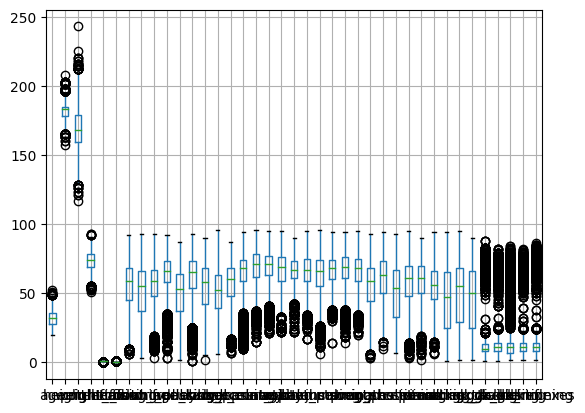

In [6]:
X_train.boxplot()

In [7]:
from sklearn.preprocessing import RobustScaler

#중앙값(median) 0, IQR(interquartile range, Q3-Q1) 1이 되도록 변환
scaler= RobustScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

#svm 모형은 데이터의 양이 많을 경우 많은 메모리를 사용하여 속도가 매우 느려질 수 있으므로
#BaggingClassifier를 사용하는 것을 권장함
#  1개의 기계학습모형이지만 데이터 샘플을 중복사용하여 서로 다른 결과를 출력하는 다수의 모형을 비교

svm = SVC()

n_estimators = 10

model = BaggingClassifier(base_estimator=svm,
                          #     분류기
                          n_estimators=n_estimators,
                          #     분류기수
                          max_samples=1/n_estimators,
                          #     부트스트랩
                          n_jobs=-1)
                          #     cpu core -1 : 100%
model.fit(X_train_scaled,y_train)

print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled,y_test))

c:\Python3.9.13\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.9214677640603567
0.9208962048468221


In [9]:
from sklearn.metrics import classification_report

pred=model.predict(X_test_scaled)
print(classification_report(y_test,pred))

y_score = model.decision_function(X_test_scaled)
y_score

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1046
           1       0.92      0.93      0.92      1141

    accuracy                           0.92      2187
   macro avg       0.92      0.92      0.92      2187
weighted avg       0.92      0.92      0.92      2187



array([-0.03623533,  2.52813666,  0.87495709, ...,  2.97427946,
       -0.5486478 , -0.83540745])

In [10]:
# 판별함수값으로 구한 precision 평균 점수

from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_score)

0.981377638702023

In [18]:
from sklearn.metrics import PrecisionRecallDisplay

pr_display = PrecisionRecallDisplay.from_estimator(model, X_test_scaled, y_test)
pr_display

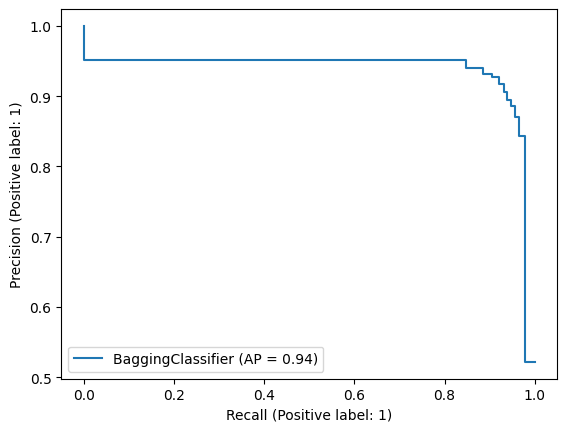

<Figure size 800x600 with 0 Axes>

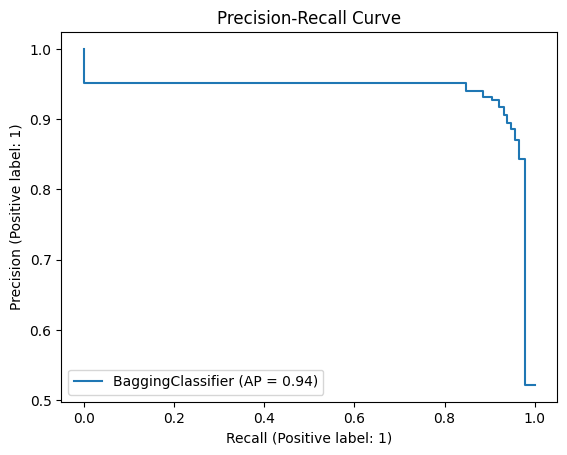

In [19]:
import matplotlib.pyplot as plt

# 그래프 그리기
plt.figure(figsize=(8, 6))
pr_display.plot()
plt.title('Precision-Recall Curve')
plt.show()